In [2]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
from sklearn.preprocessing import MinMaxScaler # 0.0 ~1.0 사이로 스케일링
from sklearn.preprocessing import LabelEncoder # 글자를 숫자로 (one hot encoding 전단계)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
from keras.utils import np_utils

In [9]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [10]:
names = ['sl', 'sw', 'pl', 'pw','class']

In [11]:
df =pd.read_csv('datasets/iris.data', names=names)

In [12]:
df

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.shape

(150, 5)

In [15]:
Y_encoded = LabelEncoder().fit_transform(df['class'])
Y_encoded
# 'Iris-setosa'=>0. 'Iris-versicolor'=>1, 'Iris-virginica'=>2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
Y = np_utils.to_categorical(Y_encoded)
# 0==>[1,0,0] 1==>[0,1,0] 2==>[0,0,1]
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [18]:
X = df.drop('class', axis=1)

In [19]:
X

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1, random_state=42)

In [23]:
check_pointer = ModelCheckpoint(filepath='iris_model.h5', monitor='val_loss',
                                verbose=1, save_best_only=True)

In [24]:
early_stopper = EarlyStopping(monitor='val_loss', patience=3)

In [36]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(4,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 38,403
Trainable params: 38,403
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [40]:
# hist = model.fit(X_train,y_train, epochs=50)

# %%time
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.1,
                 callbacks=[check_pointer, early_stopper])

Train on 121 samples, validate on 14 samples
Epoch 1/50
121/121 [==============================] - 0s 2ms/step - loss: 1.0559 - acc: 0.4628 - val_loss: 0.8802 - val_acc: 0.7143

Epoch 00001: val_loss improved from inf to 0.88025, saving model to iris_model.h5
Epoch 2/50
121/121 [==============================] - 0s 41us/step - loss: 0.9024 - acc: 0.5868 - val_loss: 0.7774 - val_acc: 0.6429

Epoch 00002: val_loss improved from 0.88025 to 0.77736, saving model to iris_model.h5
Epoch 3/50
121/121 [==============================] - 0s 49us/step - loss: 0.7702 - acc: 0.6777 - val_loss: 0.7119 - val_acc: 0.8571

Epoch 00003: val_loss improved from 0.77736 to 0.71187, saving model to iris_model.h5
Epoch 4/50
121/121 [==============================] - 0s 41us/step - loss: 0.6719 - acc: 0.8099 - val_loss: 0.6115 - val_acc: 1.0000

Epoch 00004: val_loss improved from 0.71187 to 0.61148, saving model to iris_model.h5
Epoch 5/50
121/121 [==============================] - 0s 49us/step - loss: 0.568

In [41]:
print(hist.history.keys()) # 학습기록

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


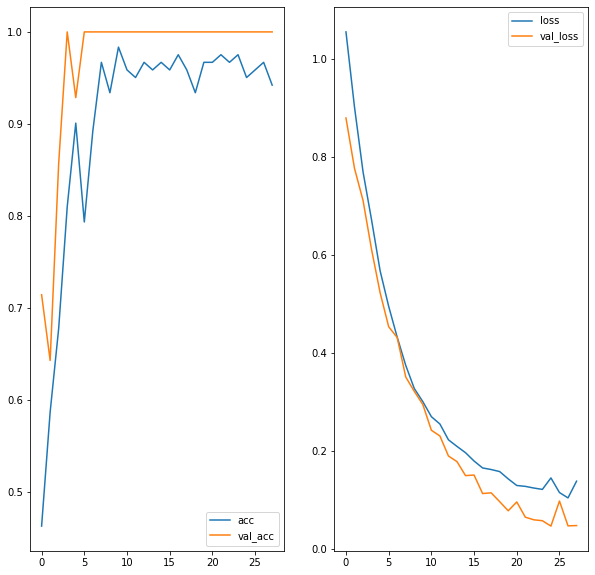

In [42]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(hist.history['acc']) #훈련 정확도
plt.plot(hist.history['val_acc']) #validation accuracy
plt.legend(['acc', 'val_acc'])

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.show()

In [43]:
loss_score = model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 65us/step


In [44]:
print(loss_score)
# [0.11835551261901855, 1.0] [loss, score]

[0.11835551261901855, 1.0]


In [45]:
pred = model.predict(X_test)
print(pred)
print(y_test)
print(model.predict_classes(X_test))

[[2.38980143e-03 9.17836487e-01 7.97737017e-02]
 [9.98902321e-01 1.09326723e-03 4.37249309e-06]
 [1.48646291e-06 2.49583391e-03 9.97502744e-01]
 [2.64007389e-03 8.94738078e-01 1.02621846e-01]
 [1.59821252e-03 9.65849221e-01 3.25526111e-02]
 [9.97945249e-01 2.04350031e-03 1.13113438e-05]
 [1.38808796e-02 9.77709413e-01 8.40967800e-03]
 [4.86715609e-04 4.04083759e-01 5.95429480e-01]
 [1.83559582e-03 6.92577600e-01 3.05586785e-01]
 [6.00357633e-03 9.82607782e-01 1.13886315e-02]
 [7.02619436e-04 4.53046143e-01 5.46251178e-01]
 [9.97199178e-01 2.77405675e-03 2.67299711e-05]
 [9.99348700e-01 6.47995214e-04 3.29262571e-06]
 [9.97150958e-01 2.82460591e-03 2.45001447e-05]
 [9.98912334e-01 1.08100858e-03 6.71395264e-06]]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]


In [46]:
# RNN ==> LSTM 실습 : 비트코인 가격 예측

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
import requests

In [50]:
from keras.models import Sequential

In [51]:
from keras.layers import Dense

In [52]:
from keras.layers import Dropout

In [53]:
from keras.layers import LSTM

In [54]:
url = "https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1405699200&end=9999999999&period=86400"

In [55]:
ret = requests.get(url)  # <Response [200]>
json_data = ret.json()

In [56]:
df_origin = pd.DataFrame(json_data)

In [57]:
df_origin

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000000,225.000000,225.000000,244.000000,4.627631e+01,0.193117,239.627778
1,1424390400,245.000000,240.250000,240.250118,240.250000,5.589490e+01,0.230429,242.568479
2,1424476800,245.000000,245.000000,245.000000,245.000000,1.472224e+01,0.060091,245.000000
3,1424563200,249.000000,235.000000,245.000000,235.000000,1.291212e+02,0.539055,239.532608
4,1424649600,235.001000,235.000000,235.000002,235.000000,9.656756e+01,0.410926,235.000062
...,...,...,...,...,...,...,...,...
2009,1597881600,11878.798593,11672.548482,11757.198800,11856.723407,1.034023e+07,877.129460,11788.721309
2010,1597968000,11878.167814,11494.000000,11853.929574,11527.476424,1.233026e+07,1053.637962,11702.555204
2011,1598054400,11686.455080,11375.126813,11527.446471,11667.369992,7.433553e+06,644.064745,11541.624285
2012,1598140800,11713.941372,11516.580481,11665.725741,11647.230277,6.922739e+06,595.195203,11631.039083


In [58]:
df_origin.to_csv('bitcoin_origin.csv', encoding='utf-8', index=False)

In [59]:
scaler = MinMaxScaler()

In [60]:
df_origin[['close']] = scaler.fit_transform(df_origin[['close']])

In [61]:
df_origin.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000,225.00,225.000000,0.003428,46.276313,0.193117,239.627778
1,1424390400,245.000,240.25,240.250118,0.003231,55.894897,0.230429,242.568479
2,1424476800,245.000,245.00,245.000000,0.003480,14.722239,0.060091,245.000000
3,1424563200,249.000,235.00,245.000000,0.002955,129.121248,0.539055,239.532608
4,1424649600,235.001,235.00,235.000002,0.002955,96.567562,0.410926,235.000062


In [62]:
df_origin.to_csv("bitcoin_scaled.csv", encoding='utf-8', index=False)

In [63]:
del df_origin

In [64]:
df = pd.read_csv("bitcoin_scaled.csv")

In [65]:
df.shape

(2014, 8)

In [66]:
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000,225.00,225.000000,0.003428,46.276313,0.193117,239.627778
1,1424390400,245.000,240.25,240.250118,0.003231,55.894897,0.230429,242.568479
2,1424476800,245.000,245.00,245.000000,0.003480,14.722239,0.060091,245.000000
3,1424563200,249.000,235.00,245.000000,0.002955,129.121248,0.539055,239.532608
4,1424649600,235.001,235.00,235.000002,0.002955,96.567562,0.410926,235.000062


In [67]:
price = df['close']

In [68]:
price

0       0.003428
1       0.003231
2       0.003480
3       0.002955
4       0.002955
          ...   
2009    0.613203
2010    0.595914
2011    0.603260
2012    0.602202
2013    0.608415
Name: close, Length: 2014, dtype: float64

In [69]:
window_size = 5

In [70]:
X = []
Y = []

In [71]:
for i in range(len(price) - window_size):  # 2014 - 5 ==> 2009
    X.append( price.iloc[i:i+window_size] )  # 예) 0:5 ==> 0,1,2,3,4
    Y.append( price.iloc[i+window_size] )    # 예) 0+5 ==> 5

In [72]:
X = np.array(X)
Y = np.array(Y)

In [73]:
X.shape, Y.shape

((2009, 5), (2009,))

In [74]:
X[0]

array([0.00342784, 0.00323093, 0.00348035, 0.00295525, 0.00295525])

In [75]:
Y[0]

0.0032046727572156808

In [76]:
len(X)  # 2009

2009

In [77]:
split_val = len(X) - 200  # 2009 - 200 ==> 1809

In [78]:
X_train = X[:split_val, :]
y_train = Y[:split_val]

In [79]:
X_test = X[split_val:, :]
y_test = Y[split_val:]

In [80]:
X_train.shape, y_train.shape

((1809, 5), (1809,))

In [81]:
X_test.shape, y_test.shape

((200, 5), (200,))

In [100]:
#reshape
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
X_test = np.reshape(X_test,(X_test.shape[0], window_size, 1))
X_train.shape

(1809, 5, 1)

In [88]:
model = Sequential()

In [89]:
model.add(LSTM(128, input_shape=(5, 1)))  # (feature의_수, dimension)
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [90]:
model.compile(loss='mse', optimizer='adam')

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [92]:
%%time
model.fit(X_train, y_train, epochs=3, batch_size=1)

Epoch 1/3
1809/1809 [==============================] - 6s 4ms/step - loss: 0.0023
Epoch 2/3
1809/1809 [==============================] - 6s 3ms/step - loss: 0.0011
Epoch 3/3
1809/1809 [==============================] - 6s 3ms/step - loss: 0.0010
Wall time: 18.3 s


In [93]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

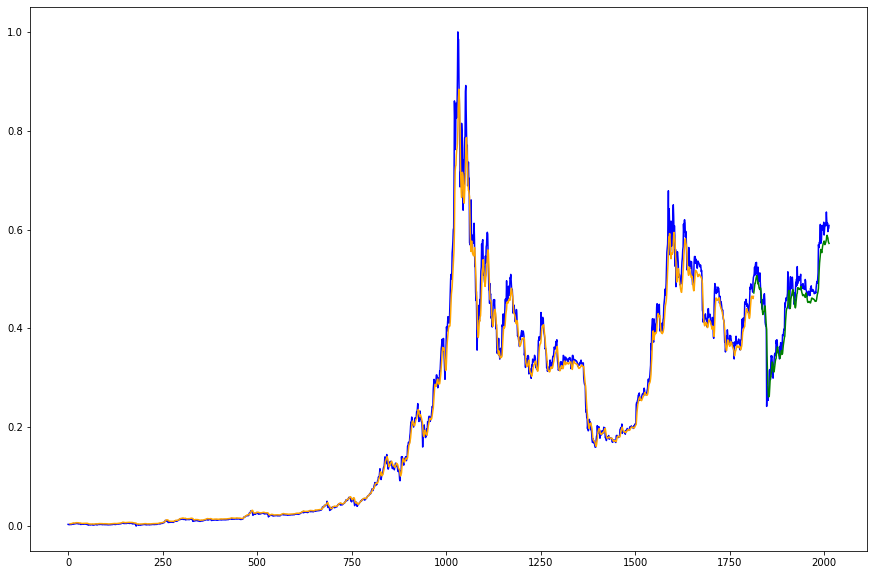

In [98]:
plt.figure(figsize=(15,10))
plt.plot(price, color='blue')
split_pt = split_val + window_size 
plt.plot(np.arange(window_size, split_pt,1), train_predict, color='orange')
plt.plot(np.arange(split_pt, split_pt+len(test_predict),1), test_predict, color='green')
plt.show()